# Project Description: Bike Rental Demand Prediction
The Bike Rental Demand Prediction project aims to develop a machine learning model that accurately predicts the total number of bikes rented based on various environmental and temporal factors. With the growing popularity of bike-sharing services, understanding and forecasting rental demand is crucial for efficient resource allocation, maintenance scheduling, and improving user satisfactio


# Loading the dataset

In [1]:
import pandas as pd
df=pd.read_csv("D:\\entri project\\hour.csv")

In [2]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# Preprocessing

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [5]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df.duplicated().sum()

0

Here there is no null values or duplicates are found so no need of handling missing or duplicated values

Here there is no need for 'dteday' column beacuse date has been splitted into 'yr'and 'month' columns 

Here the instant column is irrelevant. So we are deleting it.

In [9]:
df = df.drop('instant', axis=1)
df = df.drop('dteday', axis=1)

In [11]:
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Renaming columns for better analysis

In [10]:
df=df.rename(columns={'weathersit':'weather',
                      'mnth':'month',
                      'yr':'year',
                      'hr':'hour',
                      'hum':'humidity',
                      'cnt':'count'})
df

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In this dataset transformation, the numerical values in the columns weather, season, month, and weekday have been mapped to meaningful labels for improved readability and analysis.

In [11]:
df['weather']=df['weather'].map({1:'clear',2:'few clouds',3:'partly cloudy',4:'heavily cloudy or rain'})
df['season']=df['season'].map({1:'winter',2:'fall ',3:'summer',4:'spring'})
df['month']=df['month'].map({1:'jan',2:'feb ',3:'march',4:'april',5:'may',6:'jun',7:'july',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'})
df['weekday']=df['weekday'].map({0:'sun',1:'mon',2:'tue ',3:'wed',4:'thur',5:'fri',6:'sat'})
df

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,winter,0,jan,0,0,sat,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,winter,0,jan,1,0,sat,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,winter,0,jan,2,0,sat,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,winter,0,jan,3,0,sat,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,winter,0,jan,4,0,sat,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,winter,1,dec,19,0,mon,1,few clouds,0.26,0.2576,0.60,0.1642,11,108,119
17375,winter,1,dec,20,0,mon,1,few clouds,0.26,0.2576,0.60,0.1642,8,81,89
17376,winter,1,dec,21,0,mon,1,clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,winter,1,dec,22,0,mon,1,clear,0.26,0.2727,0.56,0.1343,13,48,61


# Data Exploration and Understanding
#### Checking for outliers

The matplotlib.pyplot (as plt) and seaborn (as sns) libraries are essential for creating visualizations in Python, with matplotlib providing basic plotting functionality and seaborn adding aesthetically pleasing statistical plots.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   year        17379 non-null  int64  
 2   month       17379 non-null  object 
 3   hour        17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  int64  
 7   weather     17379 non-null  object 
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  humidity    17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  count       17379 non-null  int64  
dtypes: float64(4), int64(7), object(4)
memory usage: 2.0+ MB


#### Analysis of target variable

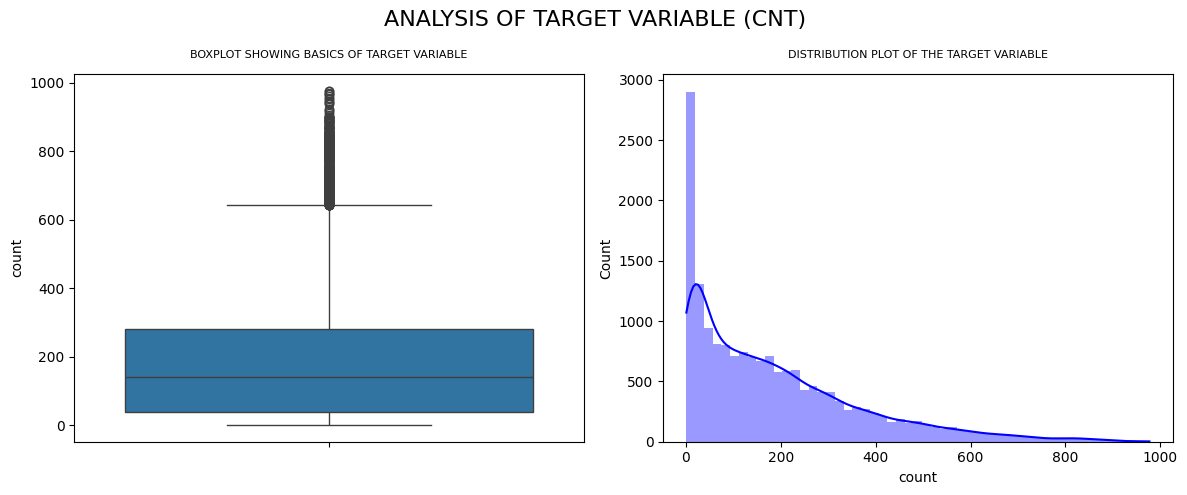

In [13]:
#creating subplot grid
fig, ax=plt.subplots(nrows =1, ncols=2, figsize = (12,5))
#giving title
fig.suptitle('analysis of target variable (cnt)'.upper(), fontsize= 16)
#plot 1
sns.boxplot(y=df['count'], ax= ax[0])
ax[0].set_title('boxplot showing basics of target variable'.upper(), fontsize = 8, fontweight =20, y=1.02)
#plot 2
sns.histplot(df,x='count',ax=ax[1], kde=True,color='blue',edgecolor="none", alpha= 0.4)
ax[1].set_title('Distribution plot of the Target variable'.upper(), fontsize=8 , fontweight= 16, y=1.02)

plt.tight_layout()
plt.show()

#### OBservations
* The count variable is positively skewed, with most values concentrated on the lower end and a long tail on the right.
* There are significant outliers above 600, as shown in the boxplot, indicating high values that deviate from the majority of the data.
* The distribution peaks close to zero, suggesting a large number of low counts.
* Due to skewness, applying a transformation improve model performance.

### Applying IQR Method

The Interquartile Range (IQR) is used to detect and handle outliers by measuring the spread of the middle 50% of a dataset. Applying IQR helps improve data quality and model performance by filtering out extreme values that could skew results.


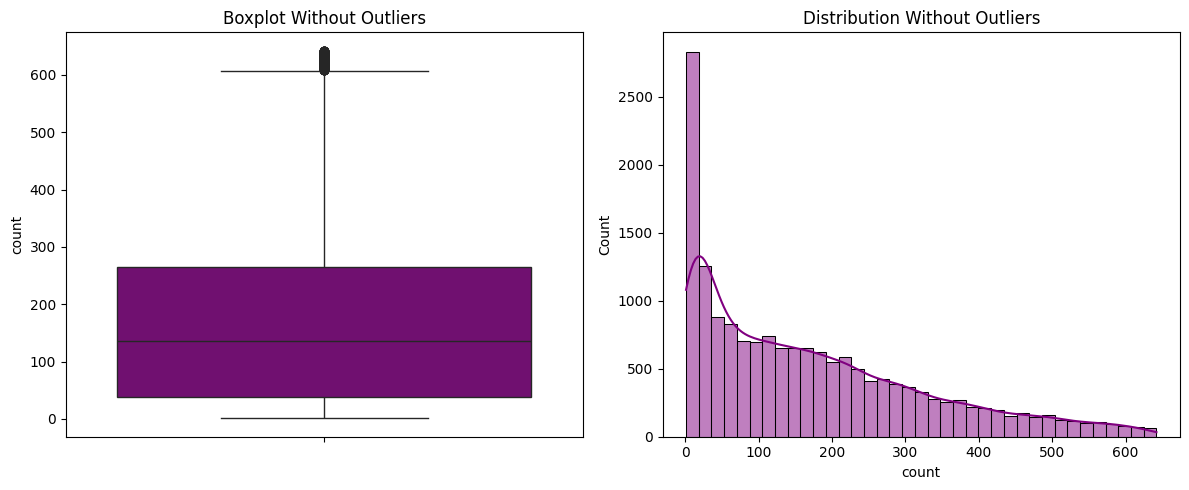

In [14]:
Q1 = df['count'].quantile(0.25)
Q3 = df['count'].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df_no_outliers = df[(df['count'] >= lower_bound) & (df['count'] <= upper_bound)]

# Plotting
plt.figure(figsize=(12, 5))

# Boxplot without outliers
plt.subplot(1, 2, 1)
sns.boxplot(y=df_no_outliers['count'], color='purple')
plt.title("Boxplot Without Outliers")

# Distribution plot without outliers
plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers['count'], kde=True, color='purple')
plt.title("Distribution Without Outliers")
plt.xlabel('count')

plt.tight_layout()
plt.show()


#### Observations
* The boxplot now has significantly fewer outliers indicating that extreme values have been successfully removed.
* The distribution of the count variable still shows a right skew, with a high concentration of values at lower counts and a gradual decline toward higher counts.
*  The median of the count variable remains between 100 and 200, consistent with the previous plot, showing that the central values are unaffected by outlier removal.
* There is still a noticeable peak near zero, suggesting that low counts are a common occurrence in this dataset, even after outlier removal.
* So going forward with another method.


#### Z-score normalization

   count  count_normalized
0     16         -0.956312
1     40         -0.823998
2     32         -0.868103
3     13         -0.972851
4      1         -1.039008


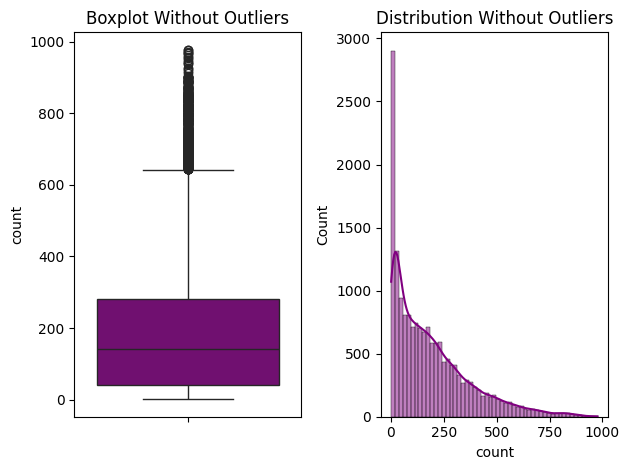

In [15]:
# Z-score normalization
df['count_normalized'] = (df['count'] - df['count'].mean()) / df['count'].std()

print(df[['count', 'count_normalized']].head())

# Boxplot without outliers
plt.subplot(1, 2, 1)
sns.boxplot(y=df['count'], color='purple')
plt.title("Boxplot Without Outliers")

# Distribution plot without outliers
plt.subplot(1, 2, 2)
sns.histplot(df['count'], kde=True, color='purple')
plt.title("Distribution Without Outliers")
plt.xlabel('count')

plt.tight_layout()
plt.show()


#### Observations
* Both methods show a right-skewed distribution. 
* The IQR method's box plot shows a few high-end values considered outliers, which the Z-score method has excluded more effectively, leading to a tighter range around zero in the histogram.
* In both methods, a high frequency of small values is observed, but the Z-score method shows a more significant spike at the lowest counts, likely due to more aggressive removal of outliers.
* Both the methods shows right skewness. So we are using another method.

### Box-Cox Transformation

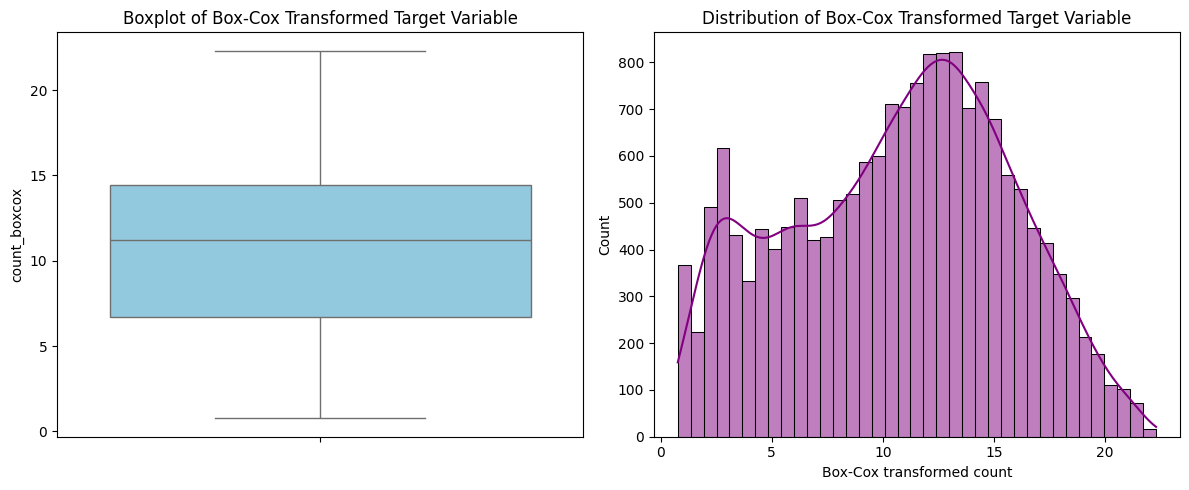

In [16]:
from scipy.stats import boxcox

# Box-Cox transformation
df['count_boxcox'], _ = boxcox(df['count'] + 1)  

# Plotting
plt.figure(figsize=(12, 5))

# Boxplot 
plt.subplot(1, 2, 1)
sns.boxplot(y=df['count_boxcox'], color='skyblue')
plt.title("Boxplot of Box-Cox Transformed Target Variable")

# Distribution plot 
plt.subplot(1, 2, 2)
sns.histplot(df['count_boxcox'], kde=True, color='purple')
plt.title("Distribution of Box-Cox Transformed Target Variable")
plt.xlabel('Box-Cox transformed count')

plt.tight_layout()
plt.show()

#### Obervations
* The histogram shows a bell-shaped, approximately normal distribution, indicating that the Box-Cox transformation has successfully reduced skewness in the data.
* In the box plot, there are no extreme outliers, as all data points fall within the whiskers.
* The interquartile range (IQR) is relatively narrow, and the data is centered around a median of approximately 10, with the majority of values ranging between 5 and 15.


### Log Transformation

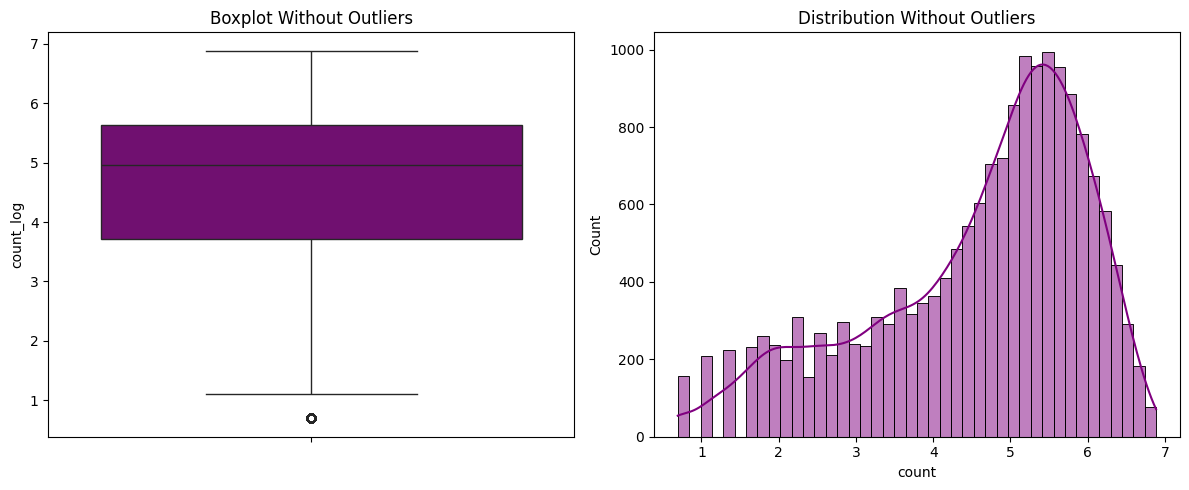

In [17]:
import numpy as np
df['count_log'] = np.log1p(df['count'])  # log1p adds 1 to avoid log(0)
# Plotting
plt.figure(figsize=(12, 5))

# Boxplot without outliers
plt.subplot(1, 2, 1)
sns.boxplot(y=df['count_log'], color='purple')
plt.title("Boxplot Without Outliers")

# Distribution plot without outliers
plt.subplot(1, 2, 2)
sns.histplot(df['count_log'], kde=True, color='purple')
plt.title("Distribution Without Outliers")
plt.xlabel('count')

plt.tight_layout()
plt.show()


### Observations
* The boxplot shows a significant reduction in outliers after applying the log transformation, with only a minimal number remaining outside the whiskers.
* The histogram indicates that the log transformation has helped normalize the distribution, making it more symmetrical and concentrated around the central values.
* Compared to other transformations, the log transformation appears to have effectively stabilized variance and enhanced data interpretability.

In [18]:
# Checking the columns to identify whether to keep it or not 
print(df.columns)

Index(['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count', 'count_normalized', 'count_boxcox', 'count_log'],
      dtype='object')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            17379 non-null  object 
 1   year              17379 non-null  int64  
 2   month             17379 non-null  object 
 3   hour              17379 non-null  int64  
 4   holiday           17379 non-null  int64  
 5   weekday           17379 non-null  object 
 6   workingday        17379 non-null  int64  
 7   weather           17379 non-null  object 
 8   temp              17379 non-null  float64
 9   atemp             17379 non-null  float64
 10  humidity          17379 non-null  float64
 11  windspeed         17379 non-null  float64
 12  casual            17379 non-null  int64  
 13  registered        17379 non-null  int64  
 14  count             17379 non-null  int64  
 15  count_normalized  17379 non-null  float64
 16  count_boxcox      17379 non-null  float6

As we can see there are so much columns created we need to delete the unwanted ones. Here 'count_log' is the column we required.      

In [20]:

df = df.drop(columns=['count','count_normalized','count_boxcox',], axis=1)
df


,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count_log
0,winter,0,jan,0,0,sat,0,clear,0.24,0.2879,0.81,0.0000,3,13,2.833213
1,winter,0,jan,1,0,sat,0,clear,0.22,0.2727,0.80,0.0000,8,32,3.713572
2,winter,0,jan,2,0,sat,0,clear,0.22,0.2727,0.80,0.0000,5,27,3.496508
3,winter,0,jan,3,0,sat,0,clear,0.24,0.2879,0.75,0.0000,3,10,2.639057
4,winter,0,jan,4,0,sat,0,clear,0.24,0.2879,0.75,0.0000,0,1,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,winter,1,dec,19,0,mon,1,few clouds,0.26,0.2576,0.60,0.1642,11,108,4.787492
17375,winter,1,dec,20,0,mon,1,few clouds,0.26,0.2576,0.60,0.1642,8,81,4.499810
17376,winter,1,dec,21,0,mon,1,clear,0.26,0.2576,0.60,0.1642,7,83,4.510860
17377,winter,1,dec,22,0,mon,1,clear,0.26,0.2727,0.56,0.1343,13,48,4.127134


### Visualizing the demand for bikes in different scenarios

##### Count of bikes during weekdays

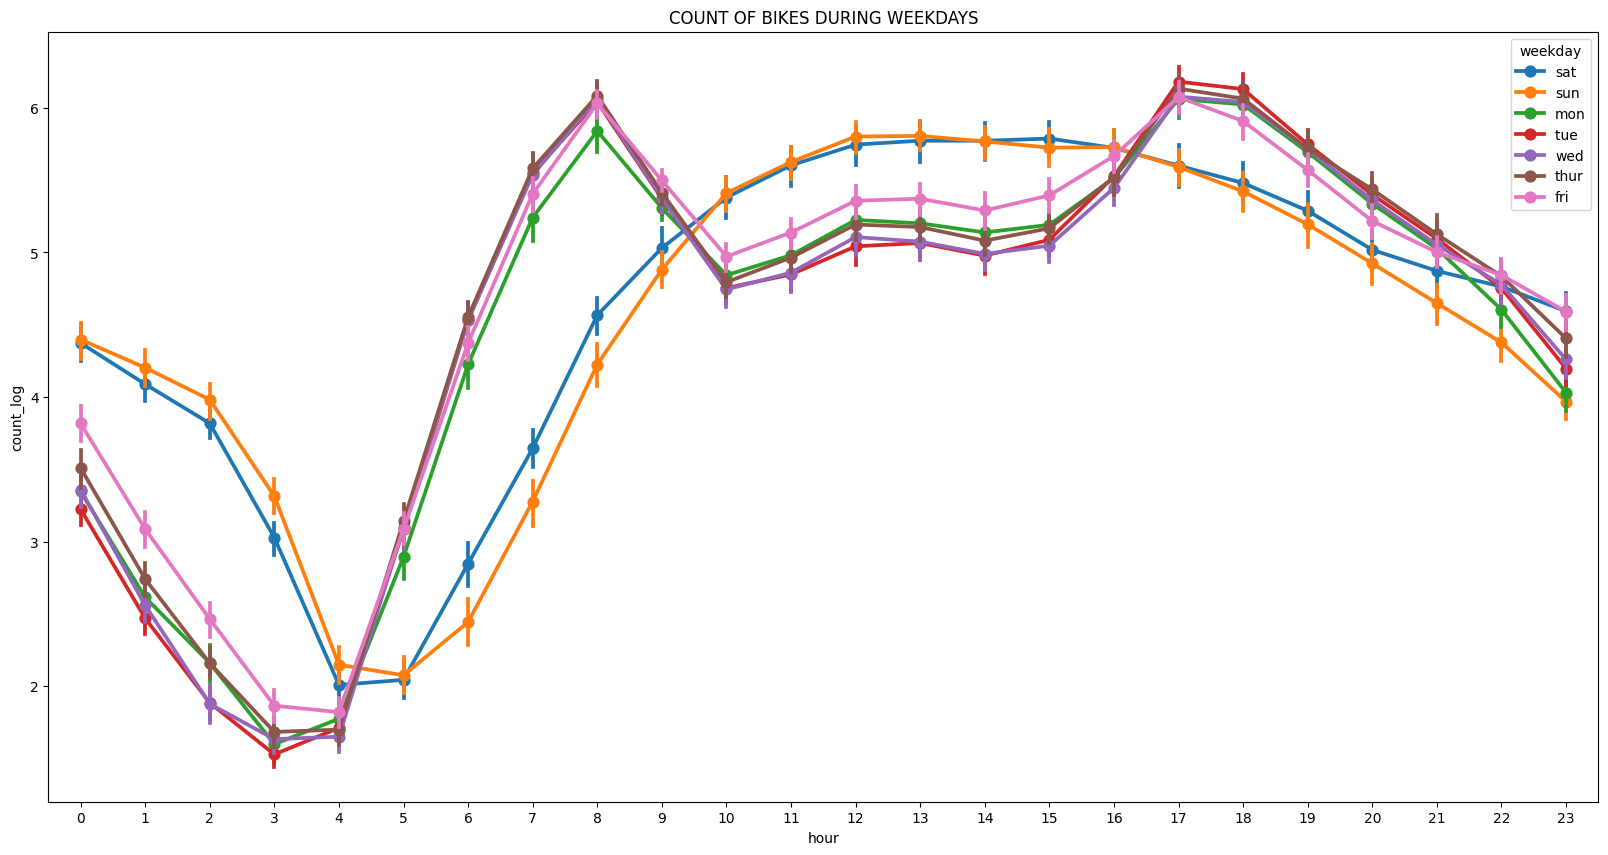

In [21]:
df['count_log'] = df['count_log'].astype(float)

# Plotting
fig, ax = plt.subplots(figsize=(20 ,10))
sns.pointplot(data=df, x='hour', y='count_log', hue='weekday', ax=ax)
ax.set(title='count of bikes during weekdays'.upper())

plt.show()

#### Obsesrvations
* Bike usage has two clear peaks during the day, around 8-9 AM and 5-6 PM.
* Bike counts drop significantly between midnight and early morning 
* During midday hours, bike usage remains relatively stable across all weekdays, though it doesn’t reach the morning or evening peak levels.

##### Count of unregistered bikes in weekdays

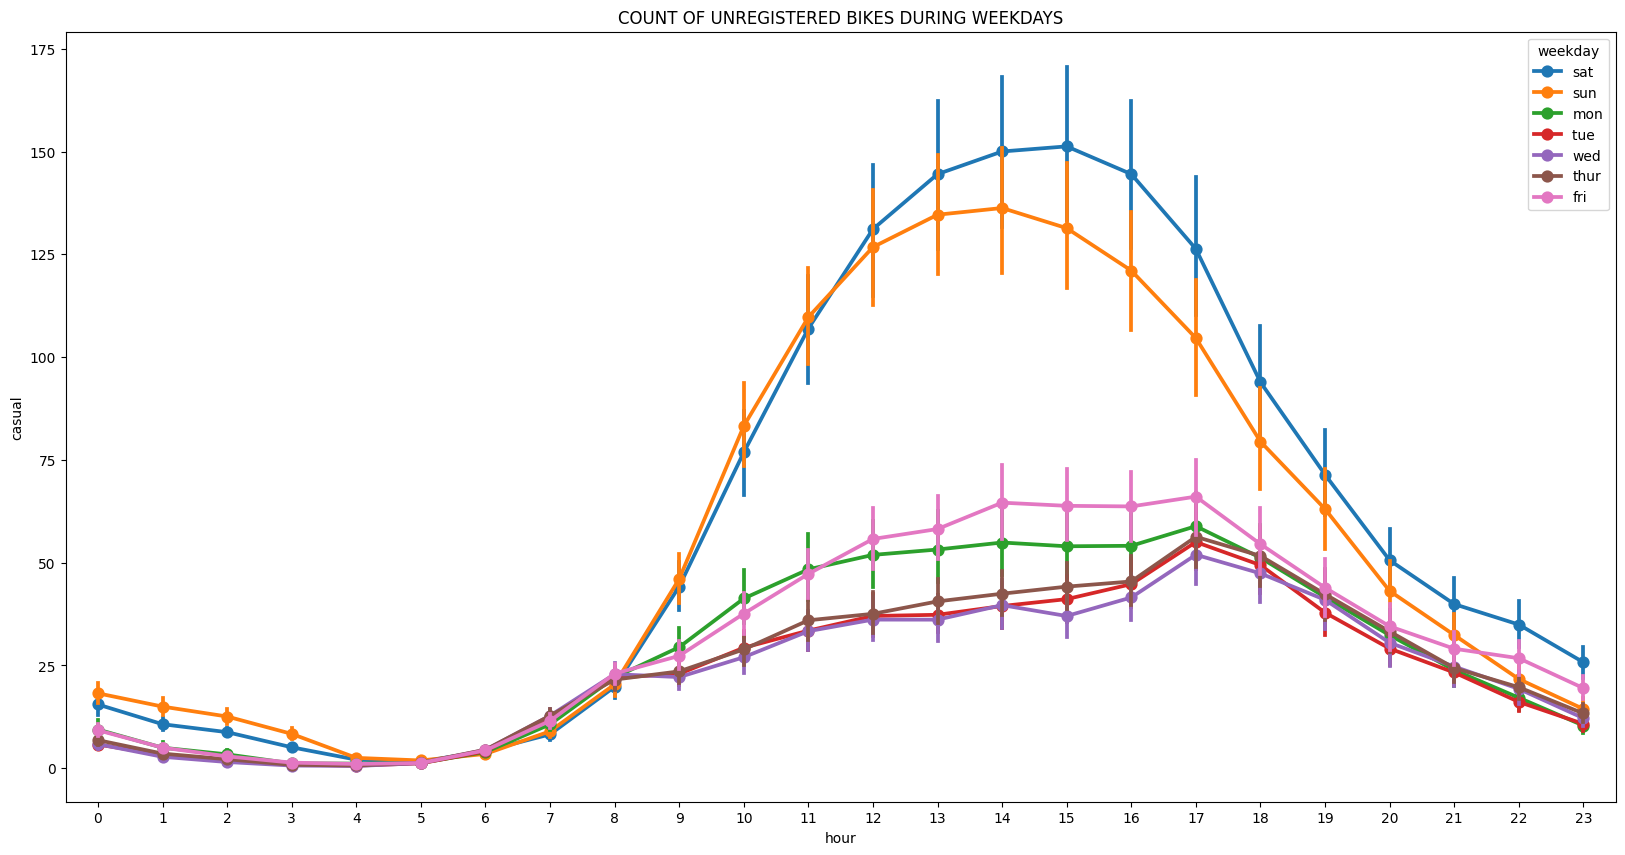

In [25]:
# Plotting
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='casual', hue='weekday', ax=ax)
ax.set(title='count of unregistered bikes during weekdays'.upper())

plt.show()


### Count of registered bikes in weekdays

[Text(0.5, 1.0, 'COUNT OF REGISTERED BIKES ON WEEKDAYS')]

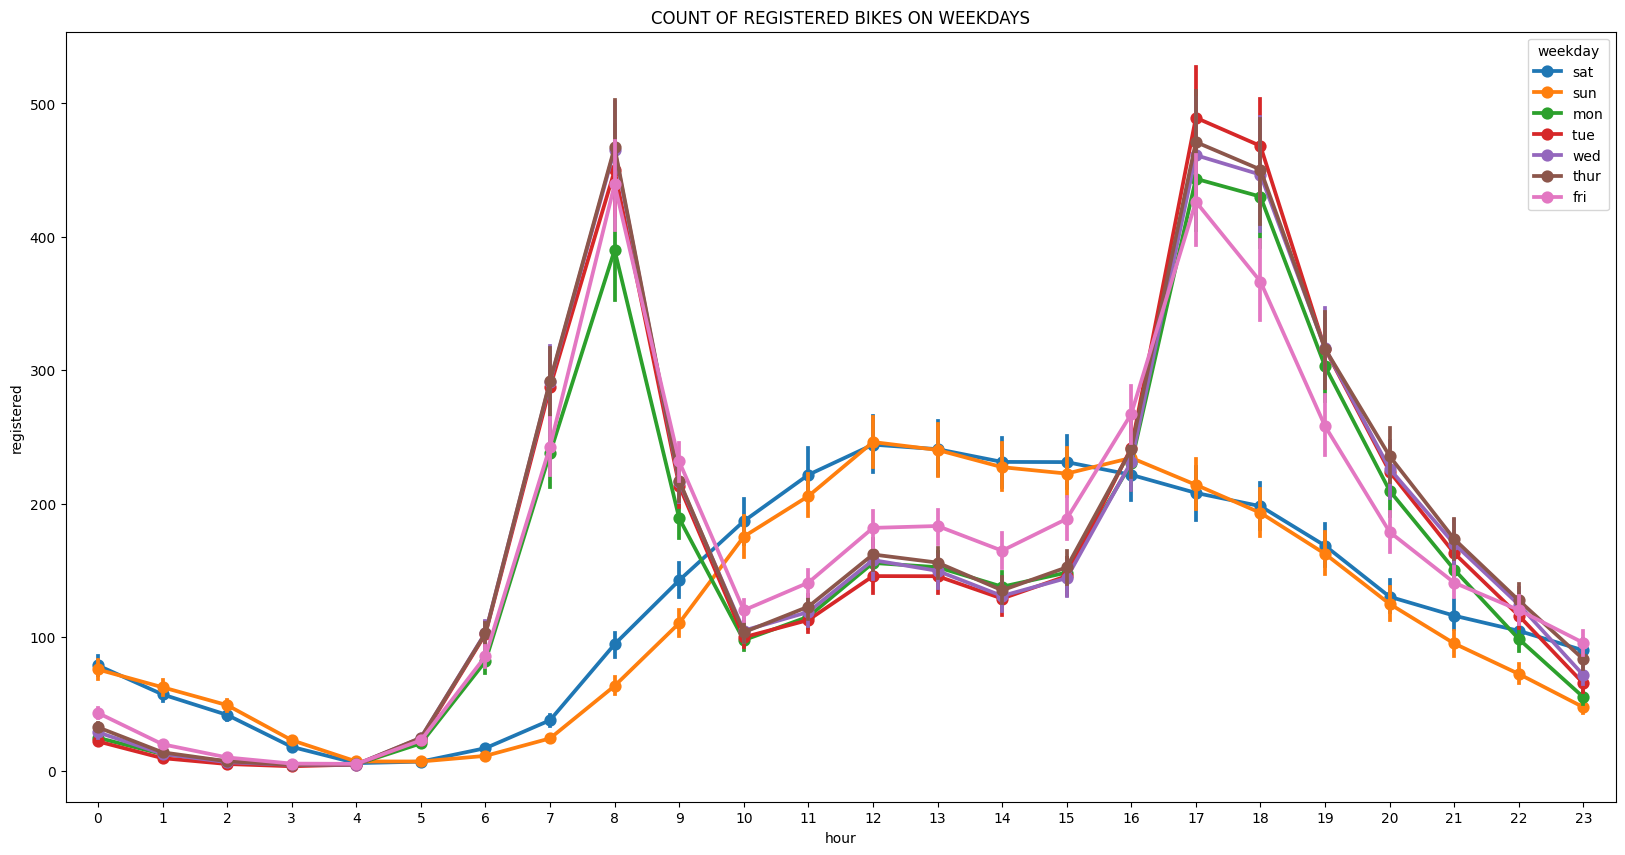

In [26]:
fig, ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='registered',hue='weekday', ax=ax)
ax.set(title='count of registered bikes on weekdays'.upper())

### Count of bikes on different weathers

[Text(0.5, 1.0, 'COUNT OF BIKES ON DIFFERENT WEATHERS')]

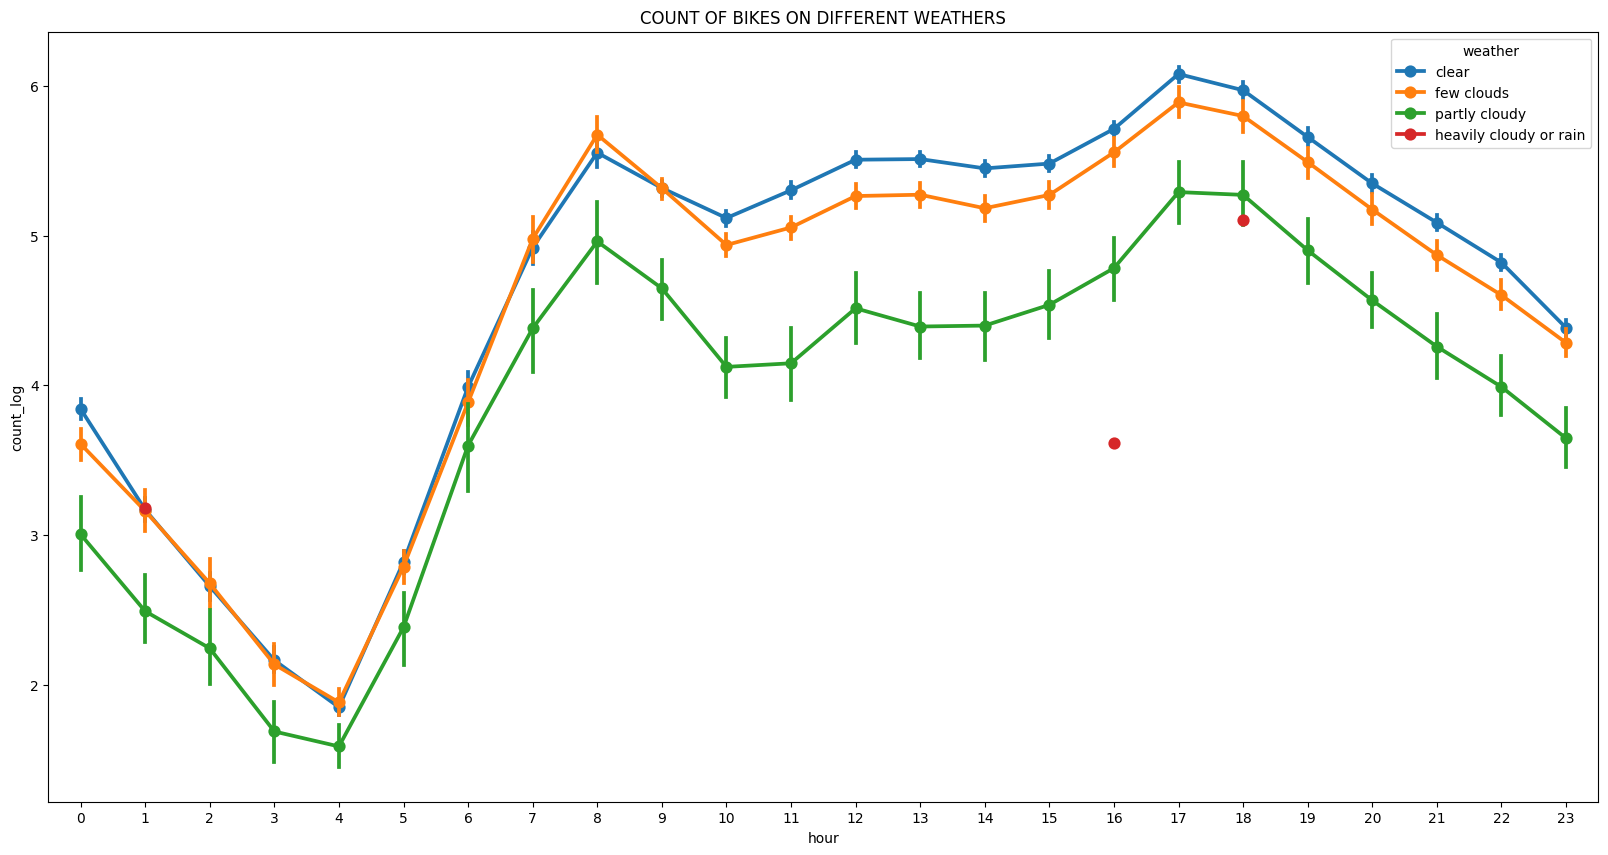

In [27]:
fig, ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count_log',hue='weather', ax=ax)
ax.set(title='count of bikes on different weathers'.upper())

##### Obseravtions
* The highest bike count is observed in clear weather.
*  In partly cloudy and heavily cloudy or rainy conditions, the bike counts are generally lower.
* Across all weather types, there's a noticeable drop in bike count around midday, particularly between 12 p.m. and 2 p.m.

### Count of bikes on different seasons

[Text(0.5, 1.0, 'COUNT OF BIKES ON DIFFERENT SEASONS')]

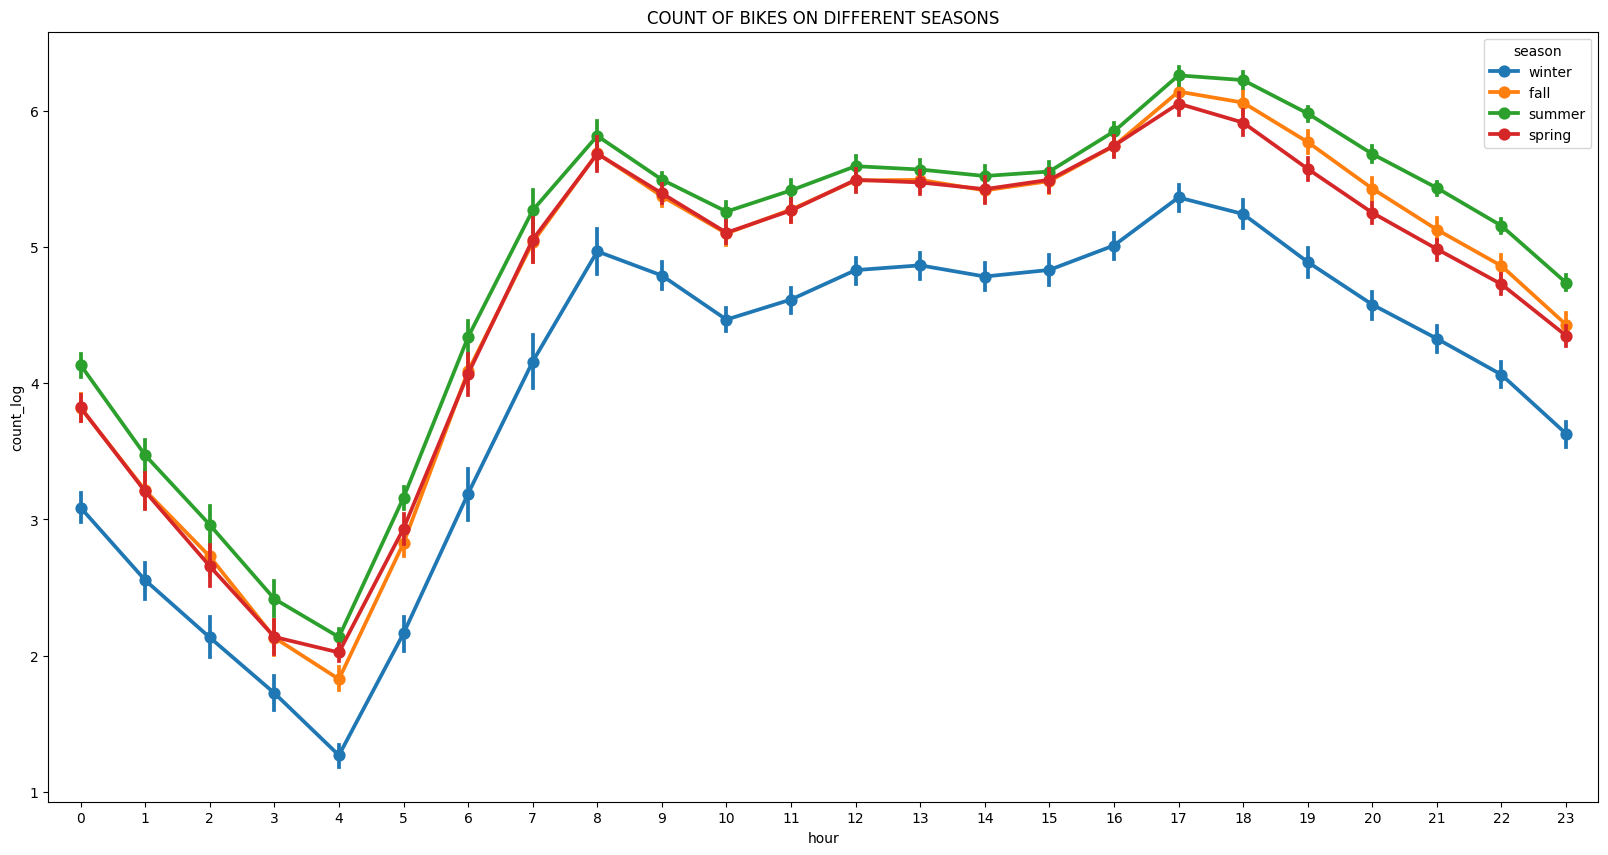

In [28]:
fig, ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count_log',hue='season', ax=ax)
ax.set(title='count of bikes on different seasons'.upper())

#### Observations
* Summer and fall show the highest bike counts throughout the day, with peak usage in the morning (around 8 a.m.) and evening (around 5 p.m.).
*  Winter has the lowest bike counts across all hours, with usage peaking lower than other seasons and remaining relatively flat throughout midday.

### Count of bikes on different month

[Text(0.5, 1.0, 'COUNT OF BIKES ON DIFFERENT MONTH')]

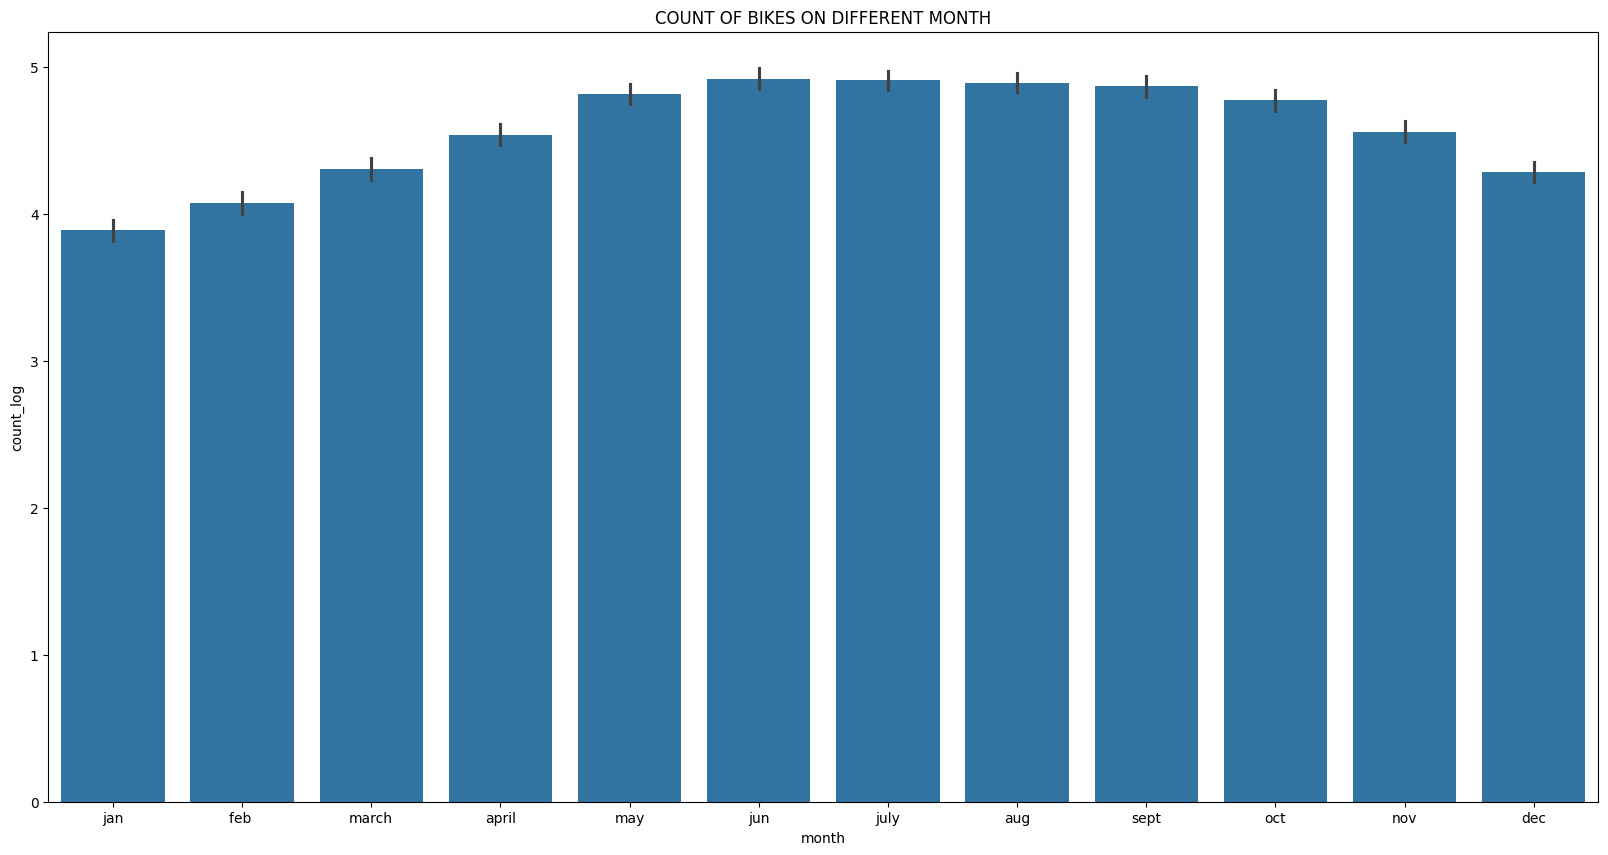

In [29]:
fig, ax=plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='month', y='count_log', ax=ax)
ax.set(title='count of bikes on different month'.upper())


* Bike counts are generally higher from May through October, peaking in the summer months (June, July, and August).
* The lowest bike counts are observed in December, January, and February.

### Count of bikes on different days

[Text(0.5, 1.0, 'COUNT OF BIKES ON DIFFERENT DAYS')]

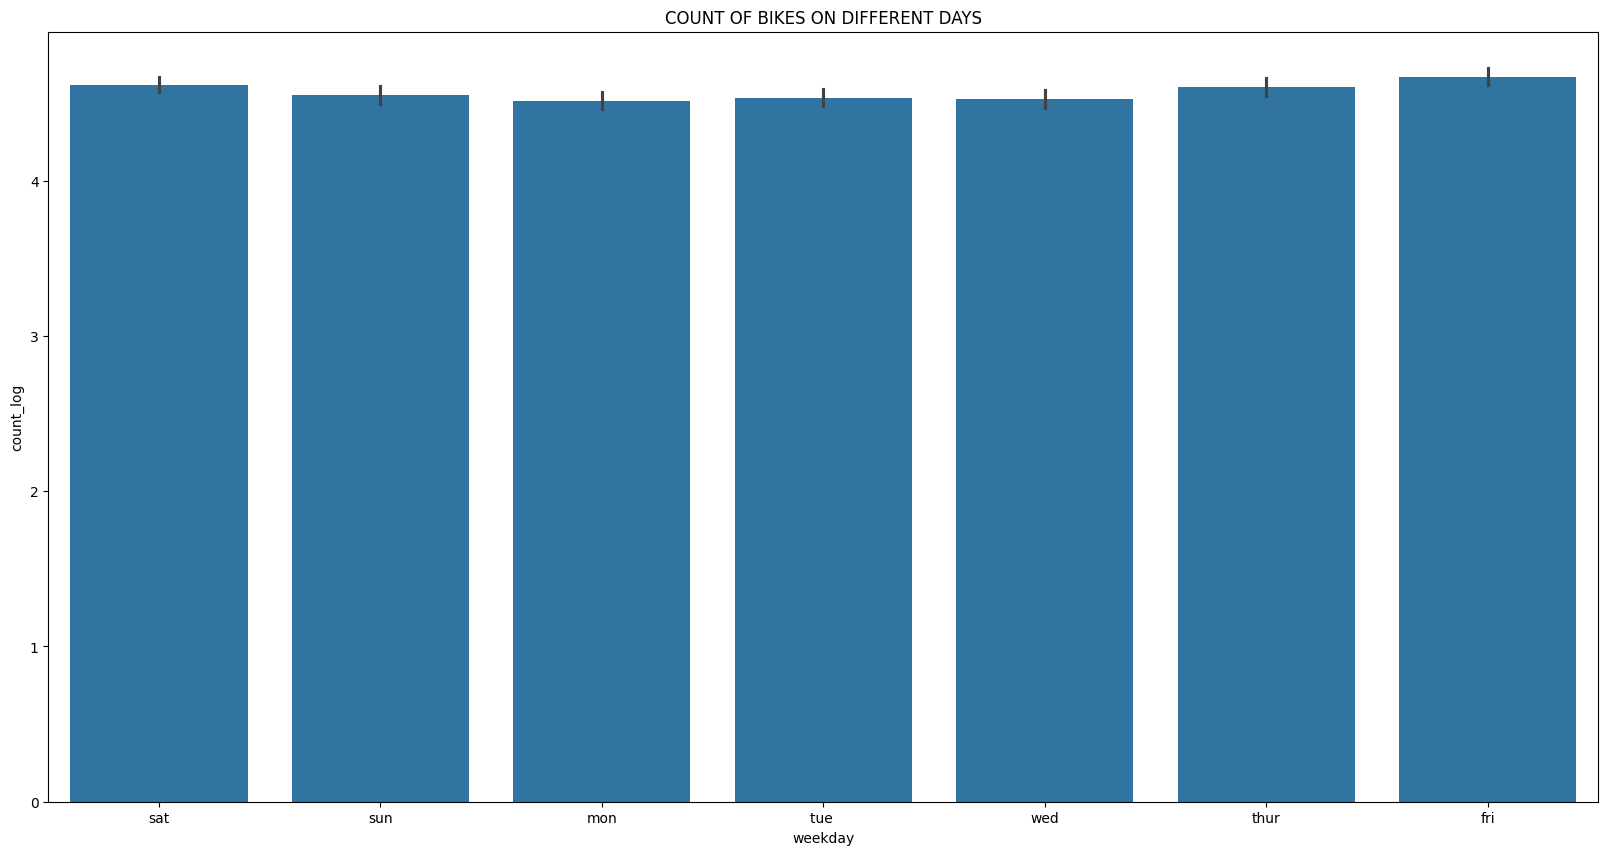

In [30]:
fig, ax=plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='weekday', y='count_log', ax=ax)
ax.set(title='count of bikes on different days'.upper())

### Correlation Matrix

In [31]:
# droping the target variable so that we only get the features
features = df.drop(columns=['count_log','casual','registered'])

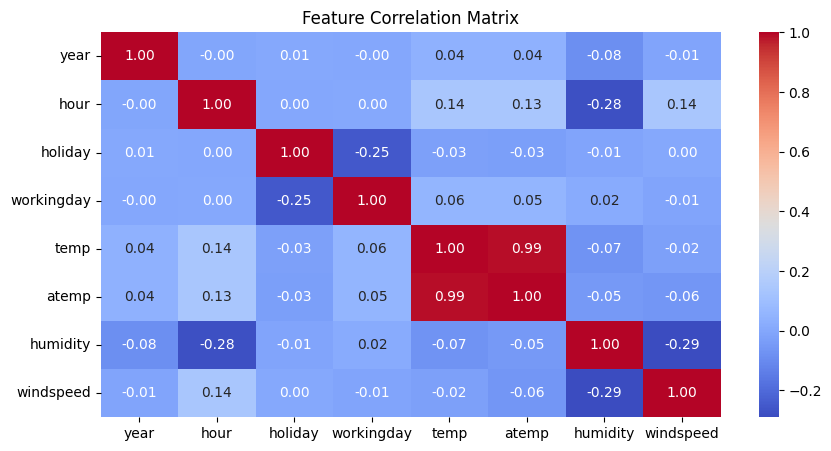

In [32]:
# Creating list of numeric variable
numeric_features = features.select_dtypes(include=['number'])
corr_matrix = numeric_features.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

#### Observations 
* Temperature and Apparent Temperature are Highly Correlated: The correlation coefficient between temp and atemp is 0.99, indicating a very strong positive correlation. This suggests that these two features are highly redundant and one of them might be removed to avoid multicollinearity.


In [22]:
df=df.drop('atemp',axis=1)
df

,season,year,month,hour,holiday,weekday,workingday,weather,temp,humidity,windspeed,casual,registered,count_log
0,winter,0,jan,0,0,sat,0,clear,0.24,0.81,0.0000,3,13,2.833213
1,winter,0,jan,1,0,sat,0,clear,0.22,0.80,0.0000,8,32,3.713572
2,winter,0,jan,2,0,sat,0,clear,0.22,0.80,0.0000,5,27,3.496508
3,winter,0,jan,3,0,sat,0,clear,0.24,0.75,0.0000,3,10,2.639057
4,winter,0,jan,4,0,sat,0,clear,0.24,0.75,0.0000,0,1,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,winter,1,dec,19,0,mon,1,few clouds,0.26,0.60,0.1642,11,108,4.787492
17375,winter,1,dec,20,0,mon,1,few clouds,0.26,0.60,0.1642,8,81,4.499810
17376,winter,1,dec,21,0,mon,1,clear,0.26,0.60,0.1642,7,83,4.510860
17377,winter,1,dec,22,0,mon,1,clear,0.26,0.56,0.1343,13,48,4.127134


##### Correlation of features with target variable

<Axes: >

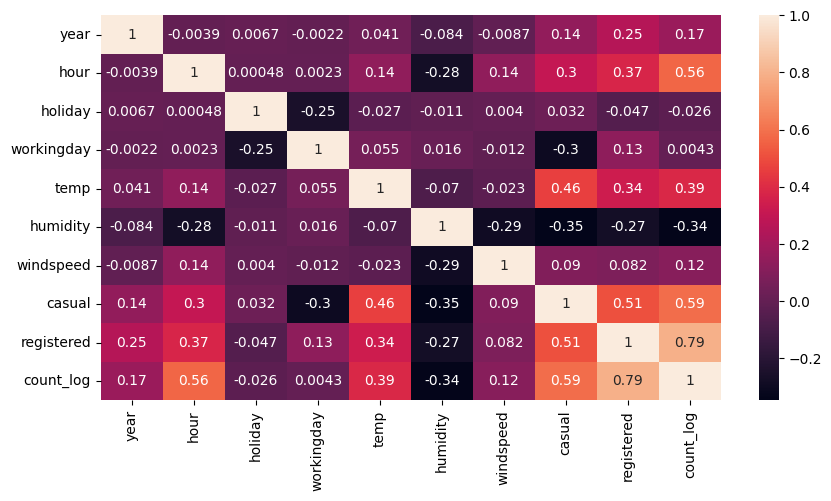

In [34]:
numeric_df = df.select_dtypes(include=['number'])
corr= numeric_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot =True, annot_kws= {'size': 10})


## Categorical Independent variable 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   year        17379 non-null  int64  
 2   month       17379 non-null  object 
 3   hour        17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  int64  
 7   weather     17379 non-null  object 
 8   temp        17379 non-null  float64
 9   humidity    17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  casual      17379 non-null  int64  
 12  registered  17379 non-null  int64  
 13  count_log   17379 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.9+ MB


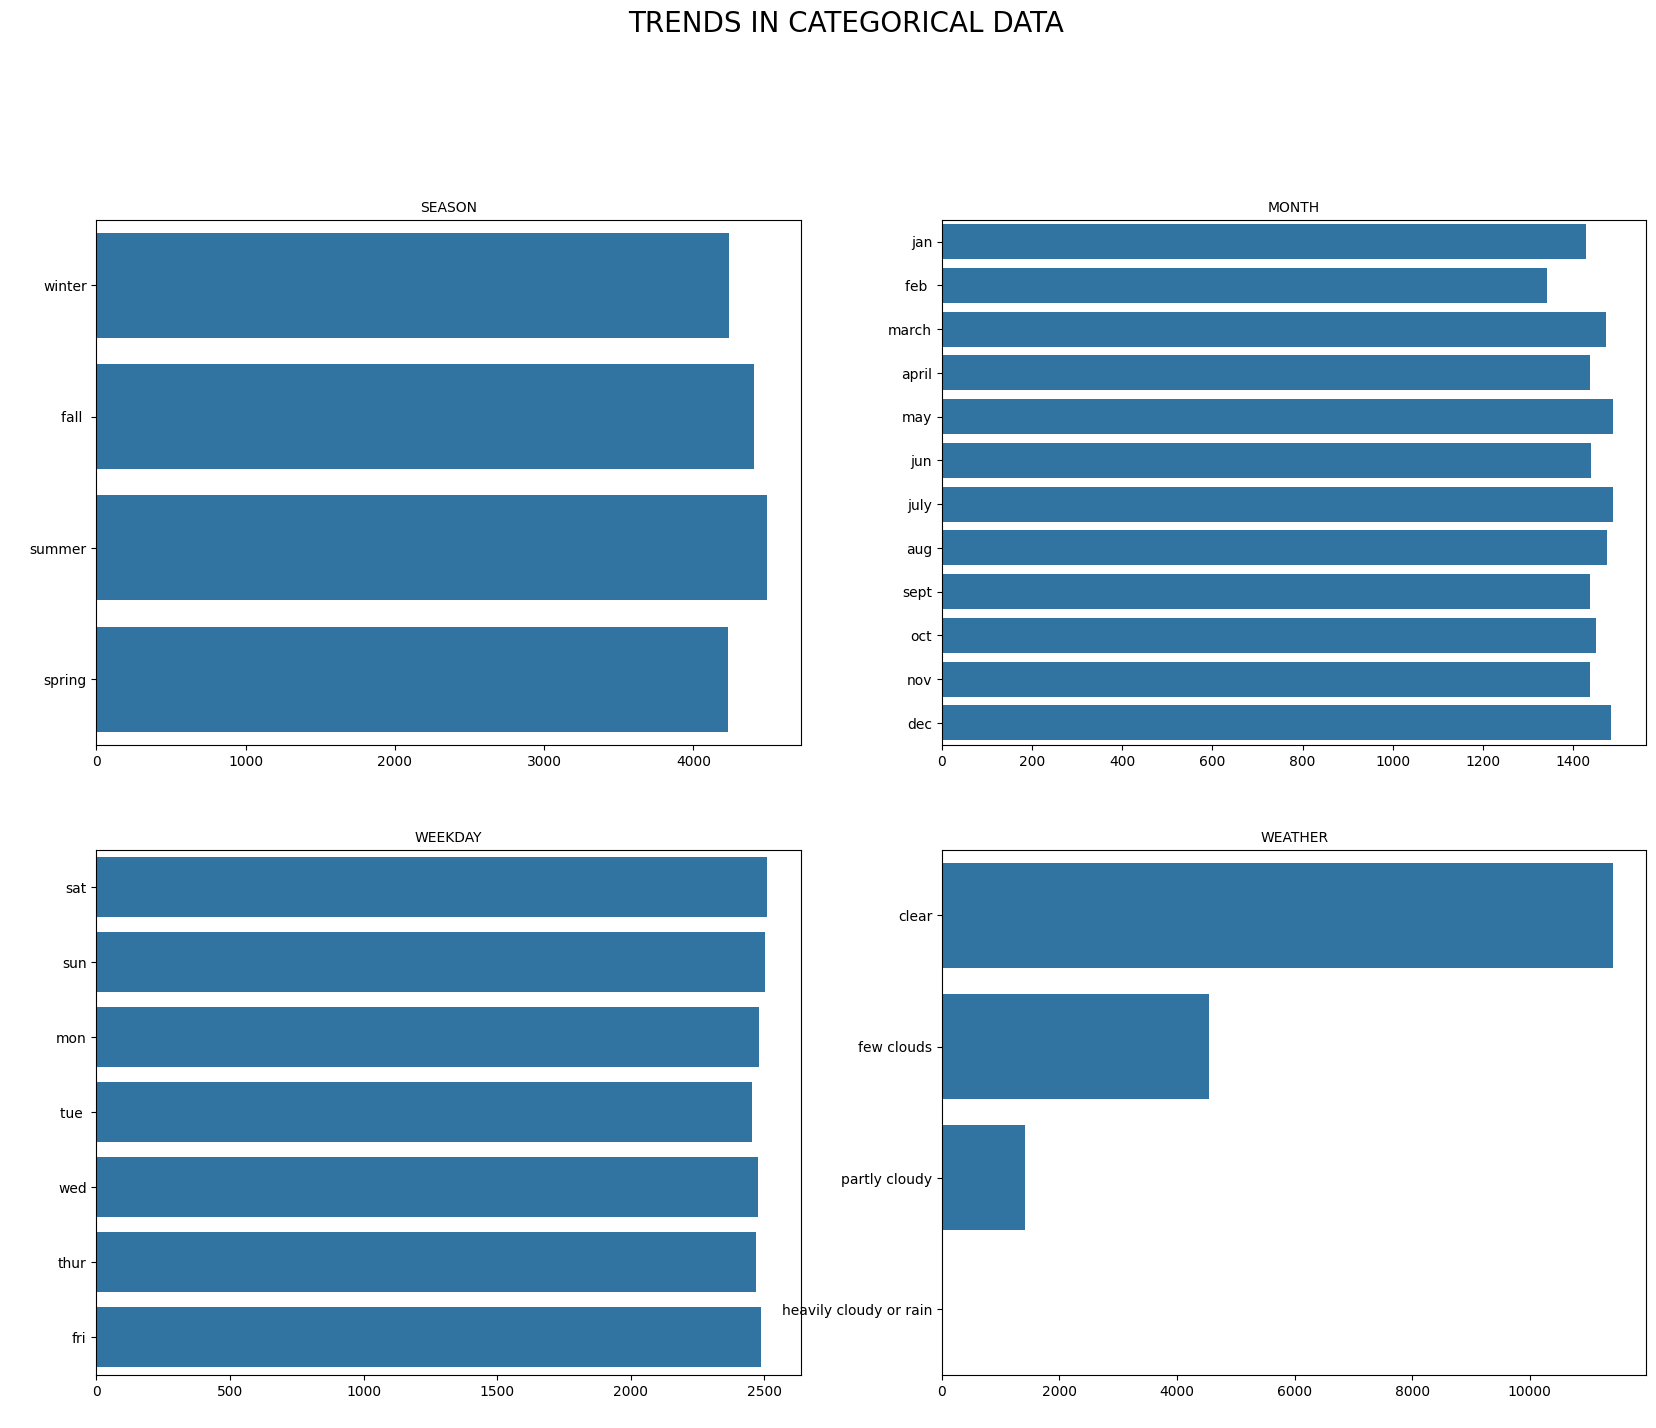

In [36]:
# Creating list of categorical variables
cat_var = df.select_dtypes(include='object').columns.tolist()

# Plotting
fig, ax=plt.subplots(nrows=2, ncols=len(cat_var) // 2, figsize=(20,15))

# main title
plt.suptitle('trends in categorical data'.upper(),fontsize= 20, fontweight= 10 , y=1.02)

# looping
k=0
for i in range (2):
    for j in range(len(cat_var)//2):
        sns.countplot(df[cat_var[k]],ax=ax[i,j])
        ax[i,j].set_title(f'{cat_var[k]}'.upper(), fontsize= 10)
        ax[i,j].set_ylabel(' ')
        ax[i,j].set_xlabel(' ')
        k+=1
plt.tight_layout
plt.show()

### Continuos independent variables

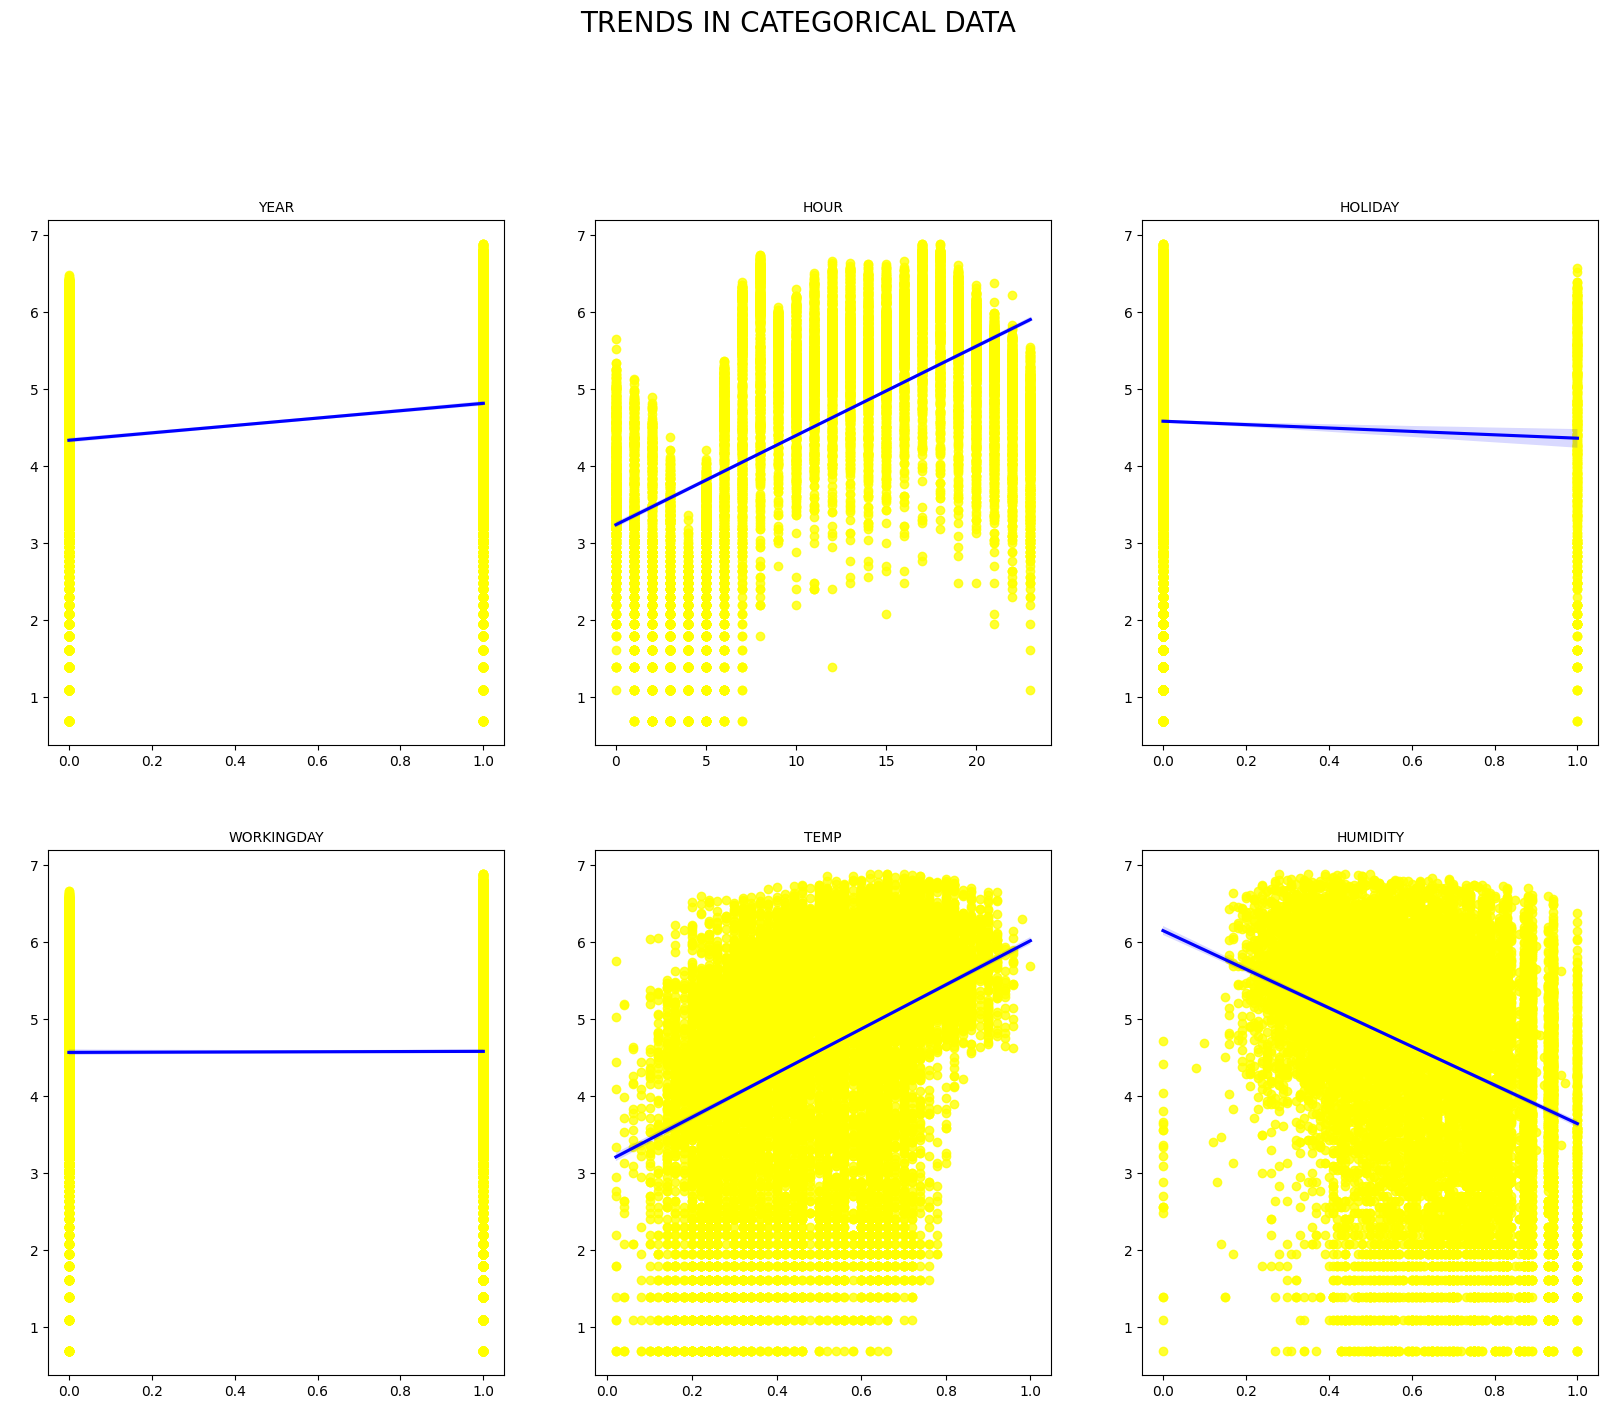

In [37]:
# Creating a list of continuous variables
target_vars=['count_log','casual','registered']
cont_var = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in target_vars]

# Plotting
fig, ax=plt.subplots(nrows=2, ncols=len(cont_var) // 2, figsize=(20,15))

# main title
plt.suptitle('trends in categorical data'.upper(),fontsize= 20, fontweight= 10 , y=1.02)

# looping
k=0
for i in range (2):
    for j in range(len(cont_var)//2):
        sns.regplot(x=df[cont_var[k]],y=df['count_log'] , ax=ax[i,j], scatter_kws={'color':'yellow'},line_kws={'color':'blue'})
        ax[i,j].set_title(f'{cont_var[k]}'.upper(), fontsize= 10)
        ax[i,j].set_ylabel(' ')
        ax[i,j].set_xlabel(' ')
        k+=1
plt.tight_layout
plt.show()

### Intervariable relationship

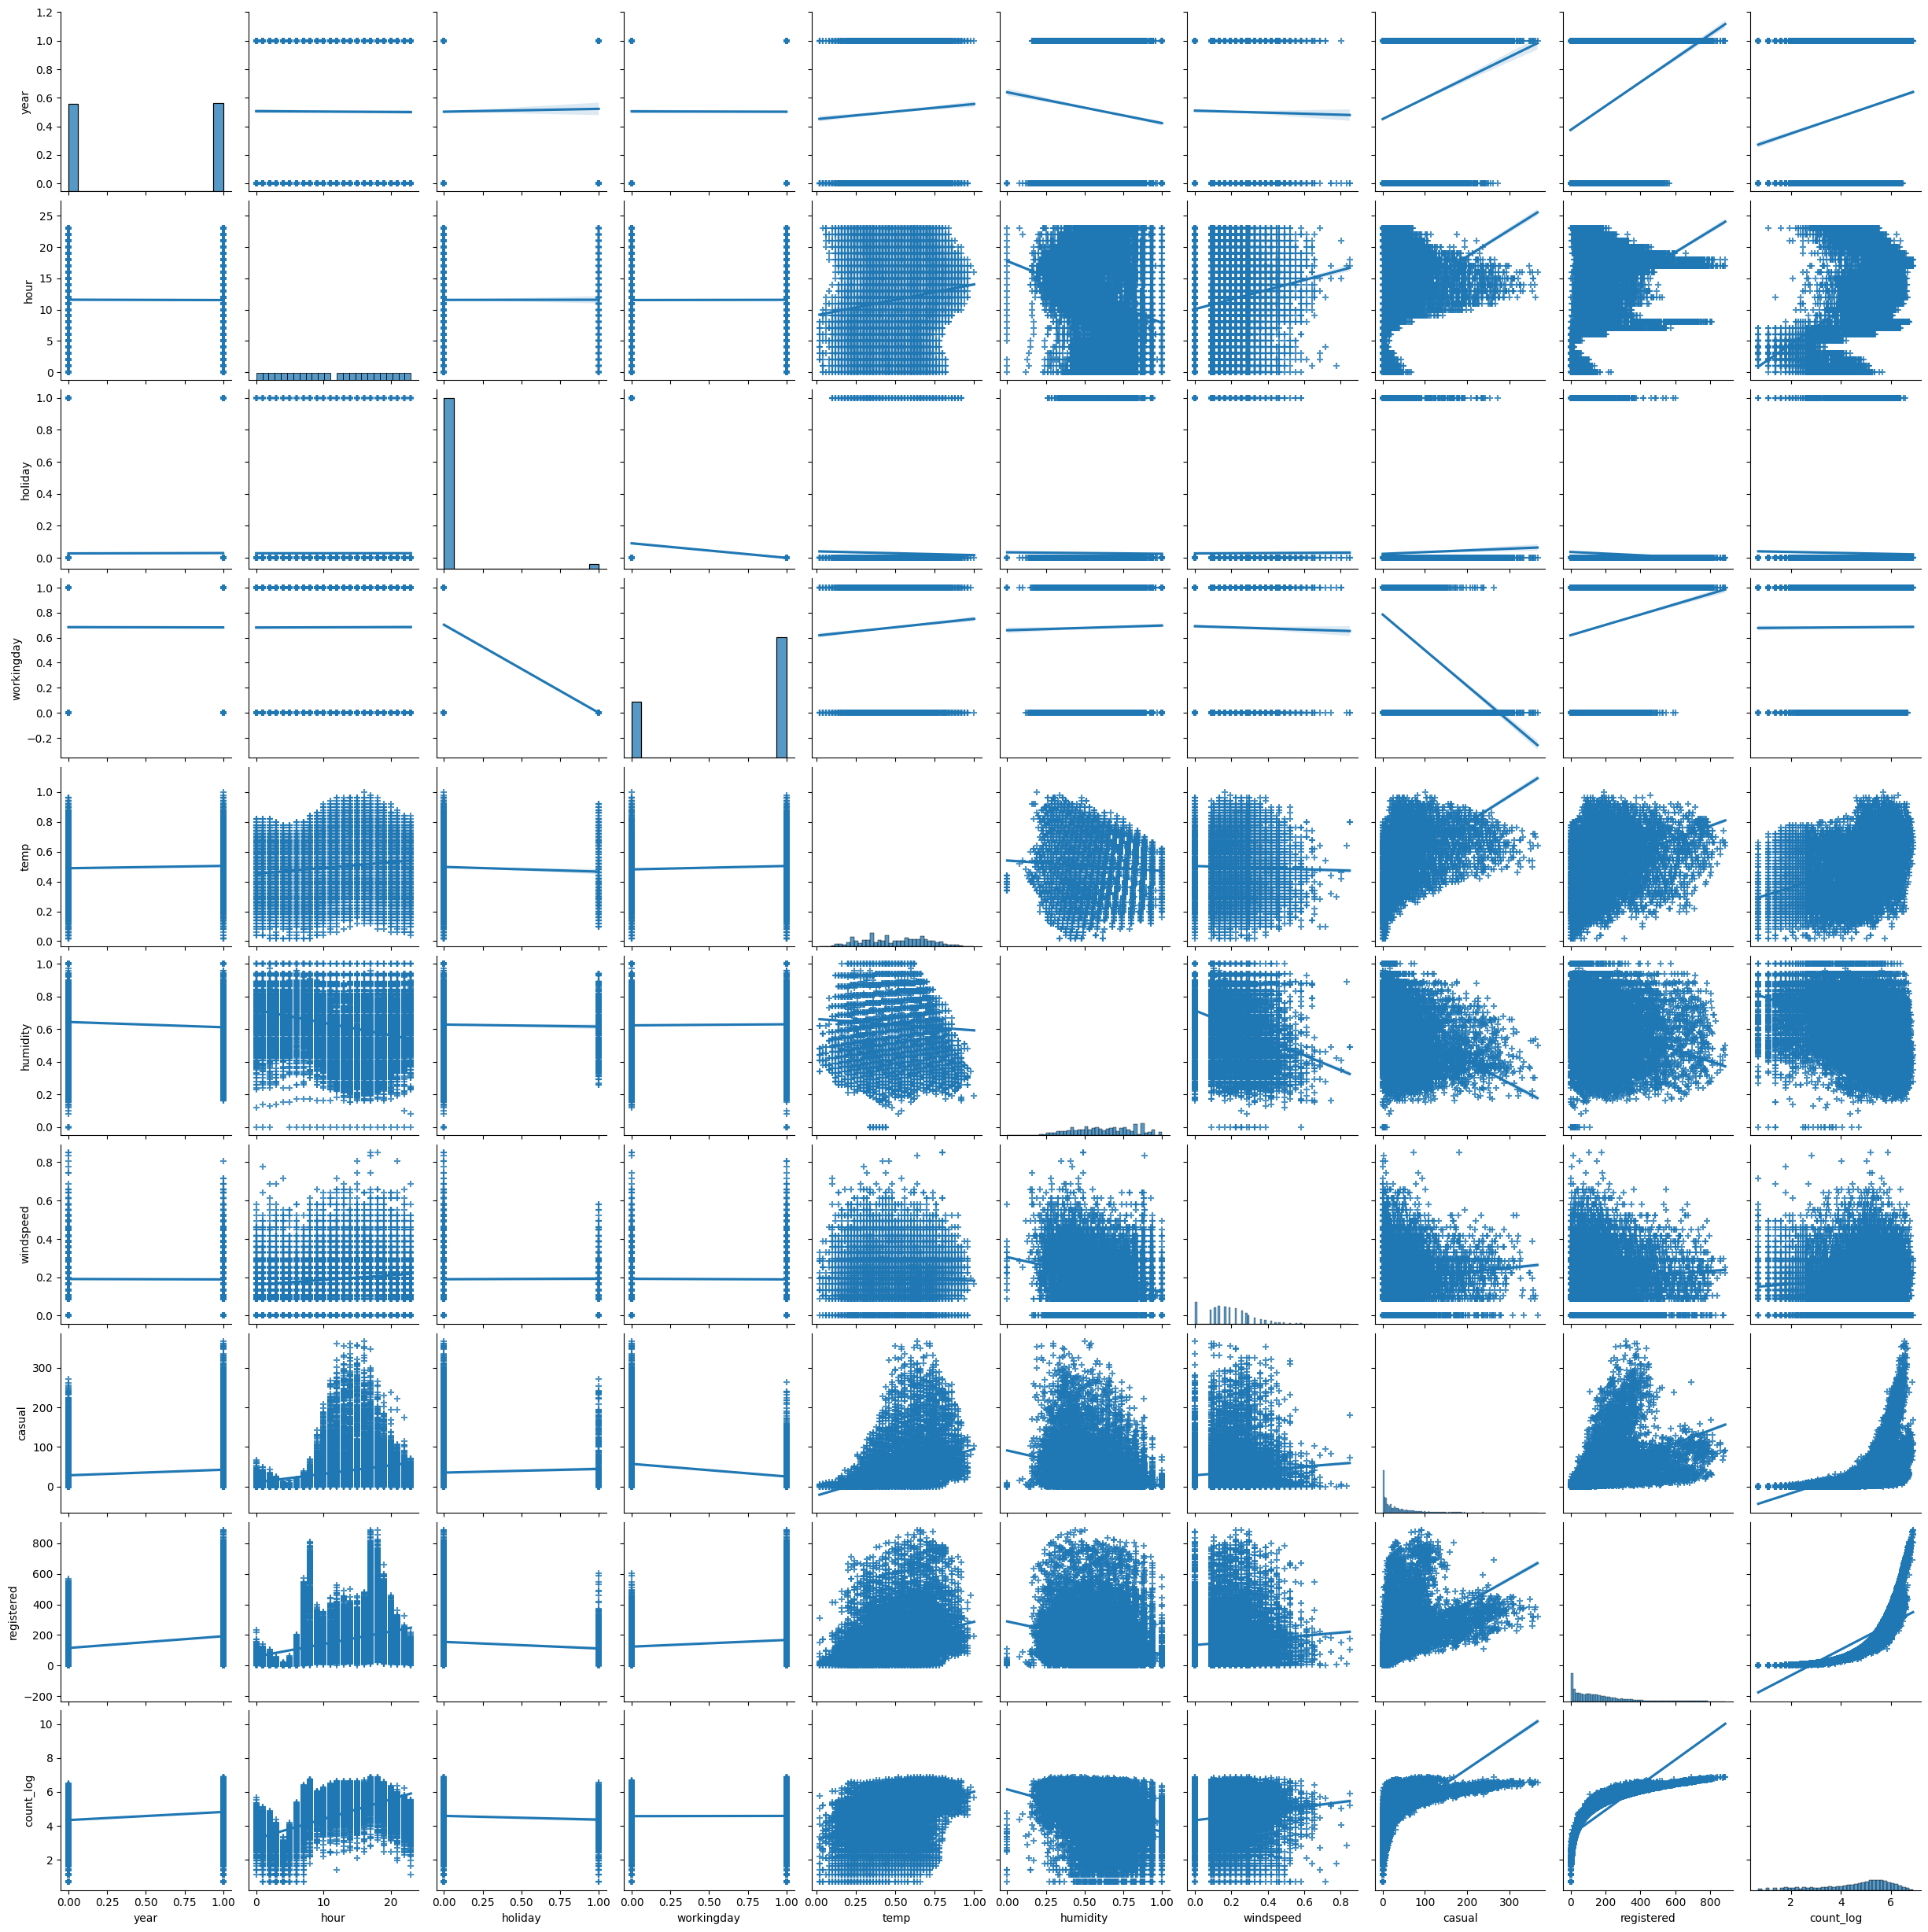

In [37]:
sns.pairplot(df,kind ='reg',markers='+')
plt.show()

# Encoding Categorical columns
## One Hot Encoding
One-hot encoding is a technique used to convert categorical data into a binary format where each category is represented by a vector with all values set to zero except for one position, which is marked as 1. This 1 indicates the presence of a particular category, making it easy for machine learning models to interpret categorical variables. It's commonly used to handle non-numeric data in algorithms that require numerical input.

In [23]:
df_ohe = df.copy()

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season', 'month', 'weekday', 'weather']
for col in cols:
    df_ohe = one_hot_encoding(df_ohe, col)

df_ohe.head()


,year,hour,holiday,workingday,temp,humidity,windspeed,casual,registered,count_log,...,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weather_few clouds,weather_heavily cloudy or rain,weather_partly cloudy
0,0,0,0,0,0.24,0.81,0.0,3,13,2.833213,...,False,False,True,False,False,False,False,False,False,False
1,0,1,0,0,0.22,0.80,0.0,8,32,3.713572,...,False,False,True,False,False,False,False,False,False,False
2,0,2,0,0,0.22,0.80,0.0,5,27,3.496508,...,False,False,True,False,False,False,False,False,False,False
3,0,3,0,0,0.24,0.75,0.0,3,10,2.639057,...,False,False,True,False,False,False,False,False,False,False
4,0,4,0,0,0.24,0.75,0.0,0,1,0.693147,...,False,False,True,False,False,False,False,False,False,False


In [24]:
df_ohe.columns

Index(['year', 'hour', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed', 'casual', 'registered', 'count_log', 'season_spring',
       'season_summer', 'season_winter', 'month_aug', 'month_dec',
       'month_feb ', 'month_jan', 'month_july', 'month_jun', 'month_march',
       'month_may', 'month_nov', 'month_oct', 'month_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thur', 'weekday_tue ',
       'weekday_wed', 'weather_few clouds', 'weather_heavily cloudy or rain',
       'weather_partly cloudy'],
      dtype='object')

In [25]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            17379 non-null  int64  
 1   hour                            17379 non-null  int64  
 2   holiday                         17379 non-null  int64  
 3   workingday                      17379 non-null  int64  
 4   temp                            17379 non-null  float64
 5   humidity                        17379 non-null  float64
 6   windspeed                       17379 non-null  float64
 7   casual                          17379 non-null  int64  
 8   registered                      17379 non-null  int64  
 9   count_log                       17379 non-null  float64
 10  season_spring                   17379 non-null  bool   
 11  season_summer                   17379 non-null  bool   
 12  season_winter                   

In [26]:
df_ohe=df_ohe.drop(columns=['casual','registered'],axis=1)
df_ohe

,year,hour,holiday,workingday,temp,humidity,windspeed,count_log,season_spring,season_summer,...,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weather_few clouds,weather_heavily cloudy or rain,weather_partly cloudy
0,0,0,0,0,0.24,0.81,0.0000,2.833213,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,1,0,0,0.22,0.80,0.0000,3.713572,False,False,...,False,False,True,False,False,False,False,False,False,False
2,0,2,0,0,0.22,0.80,0.0000,3.496508,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,3,0,0,0.24,0.75,0.0000,2.639057,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0,4,0,0,0.24,0.75,0.0000,0.693147,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,19,0,1,0.26,0.60,0.1642,4.787492,False,False,...,False,True,False,False,False,False,False,True,False,False
17375,1,20,0,1,0.26,0.60,0.1642,4.499810,False,False,...,False,True,False,False,False,False,False,True,False,False
17376,1,21,0,1,0.26,0.60,0.1642,4.510860,False,False,...,False,True,False,False,False,False,False,False,False,False
17377,1,22,0,1,0.26,0.56,0.1343,4.127134,False,False,...,False,True,False,False,False,False,False,False,False,False


In [27]:
df_ohe.columns

Index(['year', 'hour', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed', 'count_log', 'season_spring', 'season_summer',
       'season_winter', 'month_aug', 'month_dec', 'month_feb ', 'month_jan',
       'month_july', 'month_jun', 'month_march', 'month_may', 'month_nov',
       'month_oct', 'month_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thur', 'weekday_tue ', 'weekday_wed', 'weather_few clouds',
       'weather_heavily cloudy or rain', 'weather_partly cloudy'],
      dtype='object')

# Splitting the data into Training Set and Test Set

In [28]:
# Splitting
X = df_ohe.drop(columns=['count_log'], axis=1)
y = df_ohe['count_log']


In [29]:
from sklearn.model_selection import train_test_split
# coverting into Training Set and Test Set
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [30]:
print(f'Training set of X: {X_train.shape}')
print(f'Test set of X: {X_test.shape}')
print(f'Training set of y: {y_train.shape}')
print(f'Test set of y: {y_test.shape}')

Training set of X: (13903, 30)
Test set of X: (3476, 30)
Training set of y: (13903,)
Test set of y: (3476,)


# Scaling 

Scaling is often recommended, especially when using models that are sensitive to feature scales, like Support Vector Machines (SVM), K-Nearest Neighbors (KNN), and linear models (e.g., Logistic Regression). Tree-based models (e.g., Decision Trees, Random Forests) are generally less affected by scaling, but it can still be beneficial in certain cases.

When working on a regression problem, scaling y might be beneficial, especially if it has a wide range of values. In such cases, scaling y can help the model converge more easily and improve the performance of certain algorithms. If you do choose to scale y for regression, you should use the same scaler to inverse-transform predictions back to the original scale when interpreting the results.

In [31]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# scaling X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1, 1)).flatten()

# Choosing the Model 

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score



In [33]:
# Defining models
models={
    'Linear Rgression':LinearRegression(),
    'Random Forest Regression':RandomForestRegressor(),
    'Decision Tree Regression':DecisionTreeRegressor(),
    'Support Vector Regressor':SVR(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

In [34]:
#scoring for cross validation
scoring={
    'MAE':make_scorer(mean_absolute_error,greater_is_better=False),
    'MSE':make_scorer(mean_squared_error,greater_is_better=False),
    'R Squared':make_scorer(r2_score)
}

In [35]:
results={}

# Cross validating each model
for model_name, model in models.items():
    print(f'\nEvaluating {model_name}\n')
    mse_scores=cross_val_score(model,X_train_scaled,y_train,scoring=scoring['MSE'],cv=5)
    mae_scores=cross_val_score(model,X_train_scaled,y_train,scoring=scoring['MAE'],cv=5)
    r2_scores=cross_val_score(model,X_train_scaled,y_train,scoring=scoring['R Squared'],cv=5)

    # storing mean and std of each values 
    results[model_name]={
        'MAE Mean':-np.mean(mae_scores),
        'MAE std':np.std(mae_scores),
        'MSE mean':-np.mean(mse_scores),
        'MSE std':np.std(mse_scores),
        'R Squared mean':np.mean(r2_scores),
        'R Squared std':np.std(r2_scores)

    }




Evaluating Linear Rgression


Evaluating Random Forest Regression


Evaluating Decision Tree Regression


Evaluating Support Vector Regressor


Evaluating Gradient Boosting Regression



In [36]:
results_df=pd.DataFrame(results).T
print(results_df.columns)


Index(['MAE Mean', 'MAE std', 'MSE mean', 'MSE std', 'R Squared mean',
       'R Squared std'],
      dtype='object')


In [37]:
# sorting the dataframe according to the model performance so that we can identify the best best model from the first index
results_df_sorted=results_df.sort_values(by=['R Squared mean','MAE Mean','MSE mean'],ascending=[False, True, True])
print(f'\n sorted dataframe {results_df_sorted}\n')


 sorted dataframe                               MAE Mean   MAE std  MSE mean   MSE std  \
Random Forest Regression      0.222073  0.004875  0.108639  0.006684   
Gradient Boosting Regression  0.311149  0.008047  0.168458  0.011228   
Decision Tree Regression      0.300371  0.005004  0.205910  0.006782   
Support Vector Regressor      0.615885  0.017339  0.735509  0.031955   
Linear Rgression              0.785060  0.013750  1.000349  0.033332   

                              R Squared mean  R Squared std  
Random Forest Regression            0.945385       0.004311  
Gradient Boosting Regression        0.915615       0.006481  
Decision Tree Regression            0.895199       0.005703  
Support Vector Regressor            0.632143       0.007861  
Linear Rgression                    0.499568       0.005850  



In [38]:
best_model=results_df_sorted.index[0]
best_model_values=results_df_sorted.loc[best_model]
print(f'\n The best model is : {best_model}\n')
print(f"R Squared Mean :{best_model_values['R Squared mean']:.2f} (+-{best_model_values['R Squared std']:.3f})")
print(f"MAE Mean :{best_model_values['MAE Mean']:.3f} (+-{best_model_values['MAE std']:.3f})")
print(f"MSE Mean :{best_model_values['MSE mean']:.3f} (+-{best_model_values['MSE std']:.3f})")


 The best model is : Random Forest Regression

R Squared Mean :0.95 (+-0.004)
MAE Mean :0.222 (+-0.005)
MSE Mean :0.109 (+-0.007)


Random Forest Regression is the Top Performer:
 * This model consistently outperforms others across all metrics.
 * It achieves a near-perfect R-Squared score , indicating a very strong fit to the data.
 * It also has the lowest Mean Absolute Error (MAE) and Mean Squared Error (MSE), suggesting accurate predictions.


# Evaluating the Model

In [39]:
rf_model=RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled,y_train)
y_pred=rf_model.predict(X_test_scaled)

# Calculation of evaluation matrix
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Random Forest Model Performance on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Random Forest Model Performance on Test Set:
Mean Squared Error (MSE): 0.1037
Mean Absolute Error (MAE): 0.2174
R-squared (R2): 0.9494


### Observations
* The R-squared score of 0.94 indicates a good fit, meaning the Random Forest model explains 100% of the variance in the test data.
* The Mean Squared Error (MSE) being so small suggests that the model’s predictions are very close to the actual values.
* The MAE value of 0.0.217 indicates that, on average, the model's predictions deviate from the actual values by a very small amount. 

In [40]:
df=df.drop(columns=['casual','registered'],axis=1)
df

,season,year,month,hour,holiday,weekday,workingday,weather,temp,humidity,windspeed,count_log
0,winter,0,jan,0,0,sat,0,clear,0.24,0.81,0.0000,2.833213
1,winter,0,jan,1,0,sat,0,clear,0.22,0.80,0.0000,3.713572
2,winter,0,jan,2,0,sat,0,clear,0.22,0.80,0.0000,3.496508
3,winter,0,jan,3,0,sat,0,clear,0.24,0.75,0.0000,2.639057
4,winter,0,jan,4,0,sat,0,clear,0.24,0.75,0.0000,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,winter,1,dec,19,0,mon,1,few clouds,0.26,0.60,0.1642,4.787492
17375,winter,1,dec,20,0,mon,1,few clouds,0.26,0.60,0.1642,4.499810
17376,winter,1,dec,21,0,mon,1,clear,0.26,0.60,0.1642,4.510860
17377,winter,1,dec,22,0,mon,1,clear,0.26,0.56,0.1343,4.127134


In [41]:
X_user = df.drop(columns=['count_log'], axis=1)
y_user = df['count_log']
print(X_user.shape)
print(y_user.shape)

(17379, 11)
(17379,)


In [42]:
X_train_user,X_test_user,y_train_user,y_test_user=train_test_split(X_user,y_user,test_size=0.2,random_state=1)
print(f'Training set of X: {X_train_user.shape}')
print(f'Test set of X: {X_test_user.shape}')
print(f'Training set of y: {y_train_user.shape}')
print(f'Test set of y: {y_test_user.shape}')

Training set of X: (13903, 11)
Test set of X: (3476, 11)
Training set of y: (13903,)
Test set of y: (3476,)


In [43]:
from sklearn.pipeline import Pipeline
from sklearn import set_config

numeric_processor=Pipeline(steps=[("scaler",StandardScaler())])
set_config(display="diagram")
numeric_processor


Pipeline(steps=[('scaler', StandardScaler())])

In [44]:
from sklearn.preprocessing import OneHotEncoder
cat_processor=Pipeline(steps=[
    ("encoding",OneHotEncoder(handle_unknown="ignore"))
])
cat_processor

Pipeline(steps=[('encoding', OneHotEncoder(handle_unknown='ignore'))])

In [45]:
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer([
    ("categorical",cat_processor,['season','month','weekday','weather']),
    ("numberical",numeric_processor,['year','hour','holiday','workingday','temp','humidity','windspeed'])
])
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('encoding',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['season', 'month', 'weekday', 'weather']),
                                ('numberical',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['year', 'hour', 'holiday', 'workingday',
                                  'temp', 'humidity', 'windspeed'])])

In [46]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(preprocessor,RandomForestRegressor())
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['season', 'month', 'weekday',
                                                   'weather']),
                                                 ('numberical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'hour', 'holiday',
                                                   'workingday', 'temp',
                                                   'humidity',
                                                   'windspeed'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [47]:
pipe.fit(X_train_user,y_train_user)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['season', 'month', 'weekday',
                                                   'weather']),
                                                 ('numberical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'hour', 'holiday',
                                                   'workingday', 'temp',
                                                   'humidity',
                                                   'windspeed'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [48]:
import joblib
joblib.dump(pipe,"pipe.joblib")

['pipe.joblib']

In [49]:
from joblib import load
pipe = load("pipe.joblib")

In [50]:
numerical_features=['year','hour','holiday','workingday','temp','humidity','windspeed']
numerical_inputs={}
categorical_features=['season','month','weekday','weather']
categorical_inputs={}

In [51]:
print("Enter the values for numerical features:")
for feature in numerical_features:
    while True:
        try:
            value = float(input(f"Enter value for {feature}: "))
            numerical_inputs[feature] = value  
            break
        except ValueError:
            print("Invalid input. Please enter a numerical value.")

print("\nEnter the values for categorical features:")
for feature in categorical_features:
    value = input(f"Enter value for {feature}: ")
    categorical_inputs[feature] = value


user_input = {**categorical_inputs, **numerical_inputs}
input_df = pd.DataFrame([user_input])
try:
    prediction = pipe.predict(input_df) 
    rounded_prediction = round(prediction[0]) 
    print(f"\nPrediction (rounded): {rounded_prediction}")
except Exception as e:
    print(f"An error occurred during prediction: {e}")


Enter the values for numerical features:

Enter the values for categorical features:

Prediction (rounded): 5


This code implements a machine learning model to predict the total number of bikes rented based on key features such as hour of the day, temperature, working day status, year, and humidity levels. The data is preprocessed using StandardScaler to standardize the input features, ensuring consistent scaling and improved model performance. A Random Forest Regressor is trained on the dataset, with the selected features as inputs and the log-transformed number of bikes rented as the target variable.

The script includes an interactive function that allows users to input feature values. These inputs are scaled using the trained scaler and passed to the model, which predicts and outputs the total number of bikes rented. By leveraging these inputs, the model provides accurate predictions, making it a practical tool for estimating bike rental demand based on environmental and temporal conditions. This approach is effective for planning and optimizing bike-sharing services.






